In [3]:
import numpy as np
import matplotlib.pyplot as plt
import zeus

<ErrorbarContainer object of 3 artists>

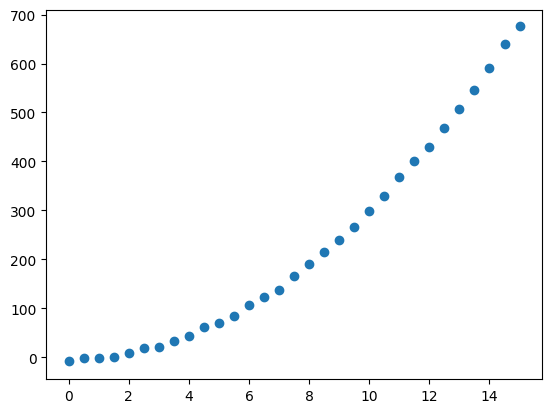

In [6]:
x,y,yerr = np.genfromtxt("../data/data.txt",unpack=True)
plt.errorbar(x,y,yerr=yerr,fmt='o')

In [7]:
def model(x, p):
#    return p[0] * np.exp(-p[1] * x) * np.cos(p[2] * x)
    return p[0] * x**2 + p[1]*x + p[2]


from scipy.stats import norm,lognorm

In [8]:
def logprior(p):
    return norm.logpdf(p[0]) + norm.logpdf(p[1]) + norm.logpdf(p[2])

def loglikelihood(y, yerr,p):
    return -0.5 * np.sum((y - model(x, p))**2 / yerr**2)

def logposterior(p):
    return logprior(p) + loglikelihood(y, yerr,p)

In [9]:
def prior_transform(cube):
    p = np.zeros(3)
    p[0] = norm.ppf(cube[0])
    p[1] = norm.ppf(cube[1])
    p[2] = norm.ppf(cube[2])
    return p

In [12]:

ndim = 3
nwalkers = 40

u = np.random.rand(nwalkers,ndim, )
start = [prior_transform(u[i,:]) for i in range(nwalkers)]
start = np.array(start)

sampler = zeus.EnsembleSampler(nwalkers, ndim, logposterior)

In [13]:
sampler.run_mcmc(start, 1000)

Initialising ensemble of 40 walkers...
Sampling progress : 100%|██████████| 1000/1000 [01:00<00:00, 16.43it/s]


In [14]:
sampler.summary

Summary
-------
Number of Generations: 1000
Number of Parameters: 3
Number of Walkers: 40
Number of Tuning Generations: 21
Scale Factor: 0.480032
Mean Integrated Autocorrelation Time: 5.25
Effective Sample Size: 7615.36
Number of Log Probability Evaluations: 225050
Effective Samples per Log Probability Evaluation: 0.033839


In [20]:
sampler.get_chain()[100:,:,:].shape

(900, 40, 3)

/opt/miniconda3/envs/mcmcfun/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/opt/miniconda3/envs/mcmcfun/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/opt/miniconda3/envs/mcmcfun/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/opt/miniconda3/envs/mcmcfun/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/opt/miniconda3/envs/mcmcfun/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/opt/miniconda3/envs/mcmcfun/lib/python3.10/site-packages/seaborn/distributions.

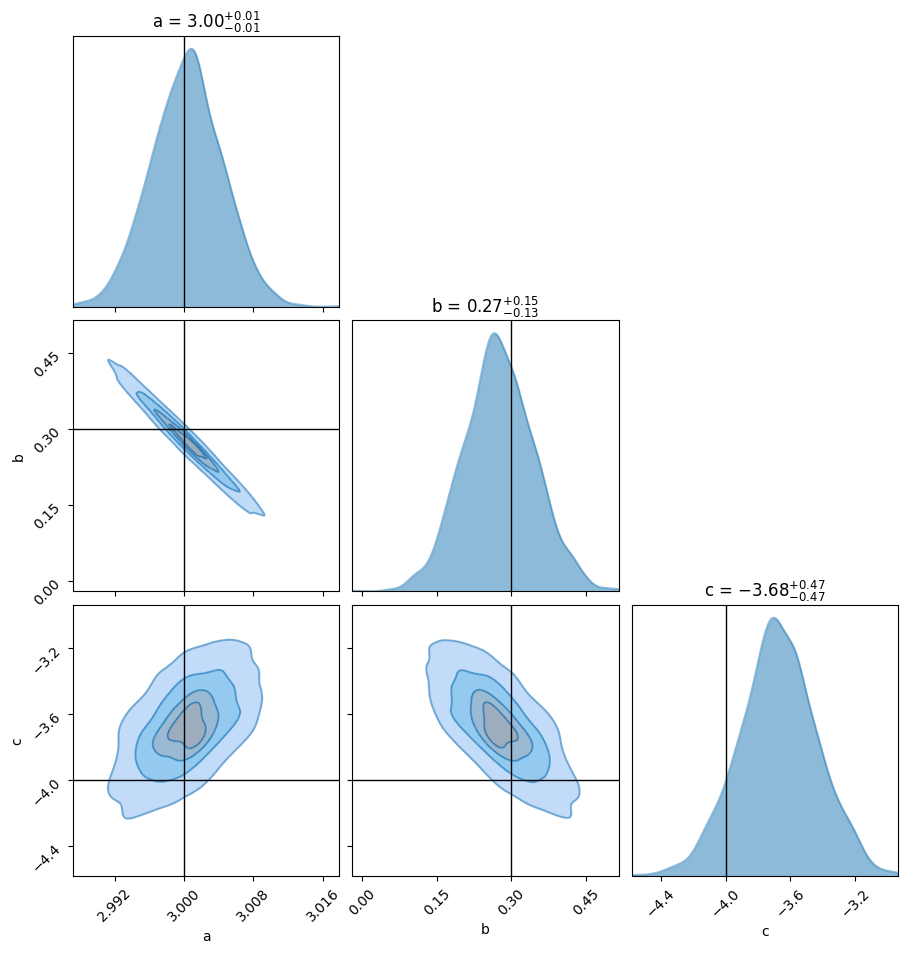

In [22]:
chain = sampler.get_chain(flat=True, discard=1000//2, thin=10)

# plot marginal posterior distributions
fig, axes = zeus.cornerplot(chain, labels=['a','b','c'], truth=[3.0, 0.30, -4]);


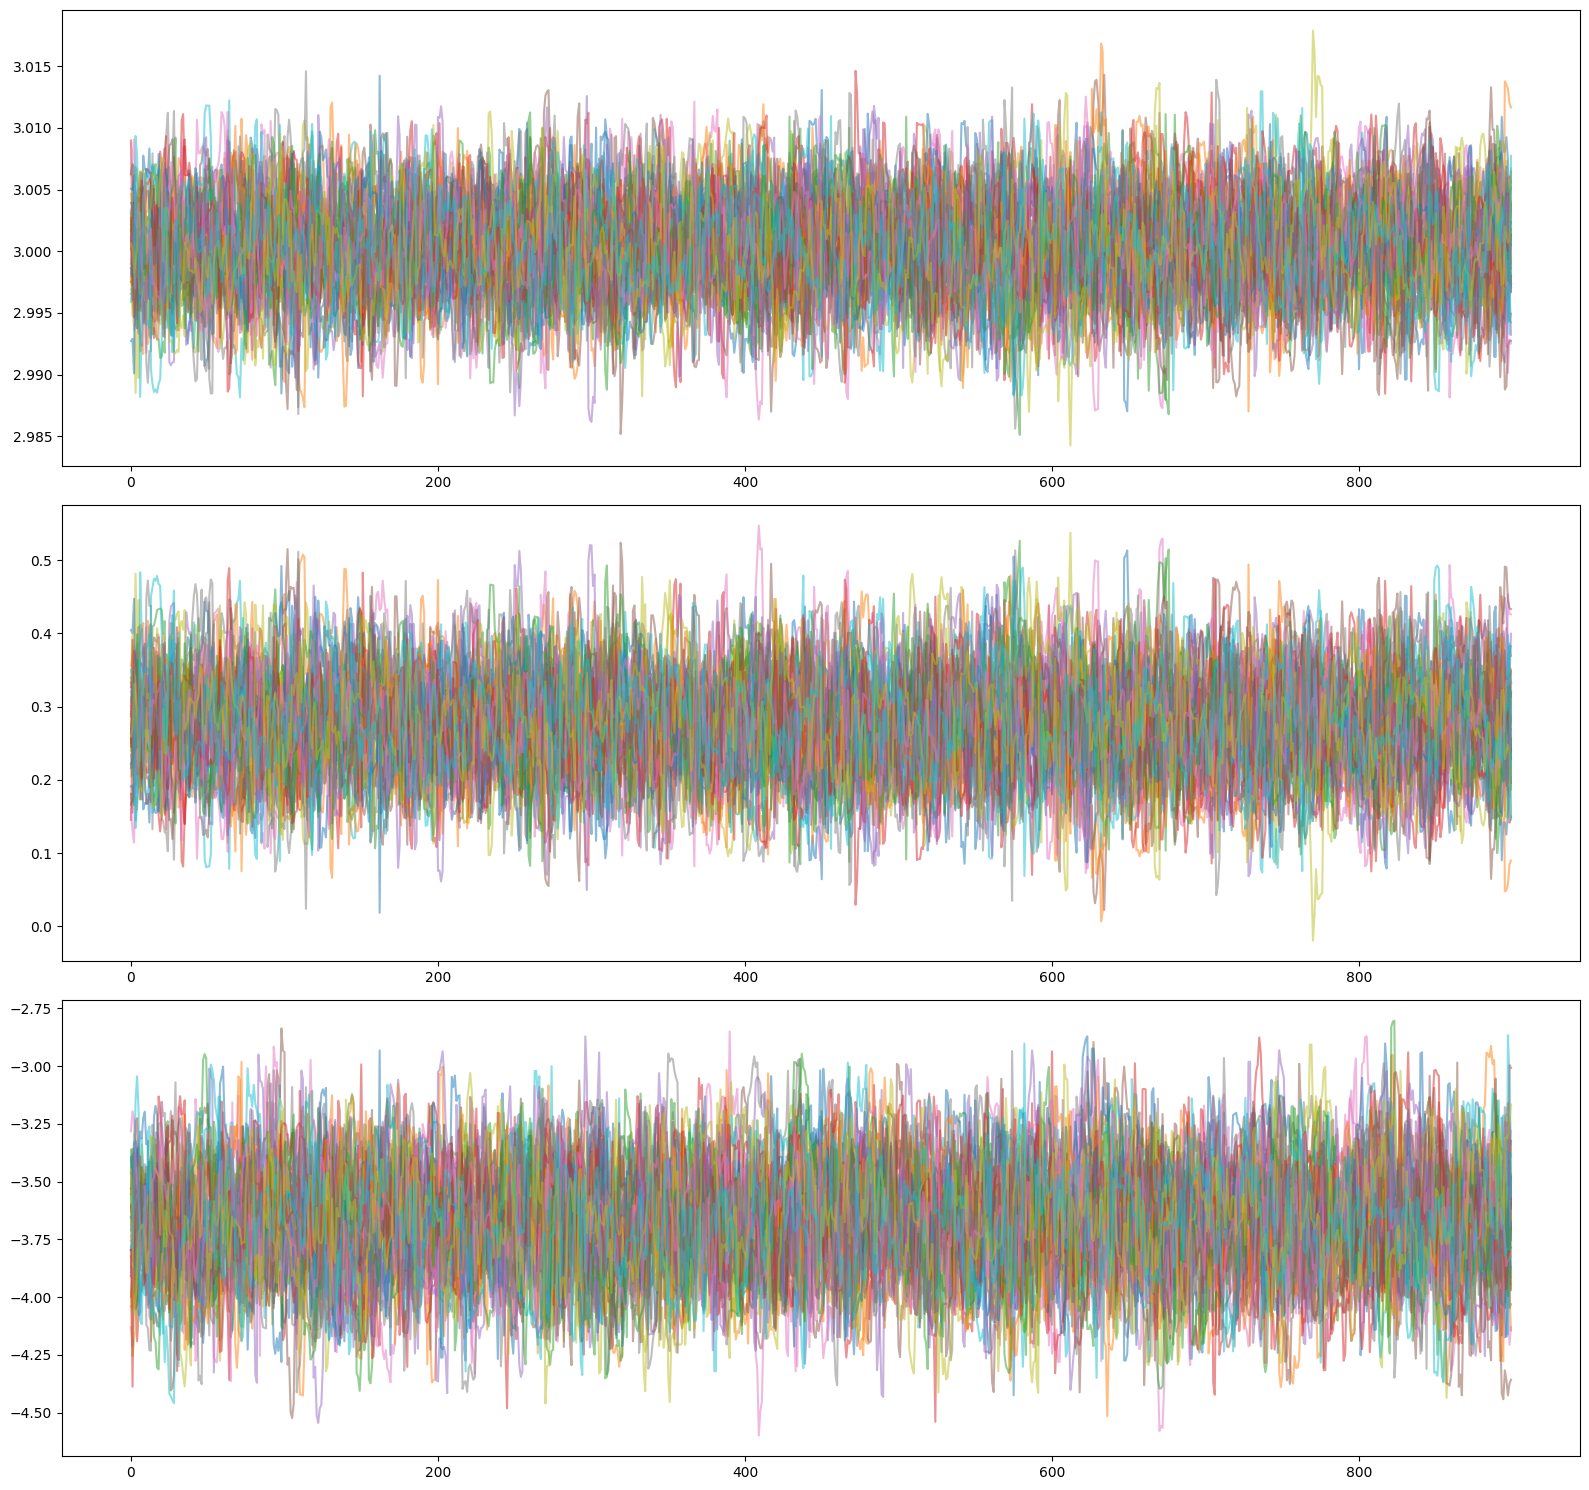

In [18]:
plt.figure(figsize=(16,5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(sampler.get_chain()[100:,:,n], alpha=0.5)
plt.tight_layout()
plt.show()